In [6]:
from scipy.special import jv
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
import pandas as pd
import matplotlib as mpl
from floquet_simulations.flux_functions import *
from pathlib import Path
from matplotlib.colors import LinearSegmentedColormap
from floquet_simulations.plot_functions import PlotParams
from floquet_simulations.hamiltonians import ConvertComplex
PlotParams(fontsize=10)

import scipy.integrate as integrate
from numpy import pi, sin, cos

def Mid(v1, v2, v3):
   return v1+v2+v3 - np.max([v1, v2, v3])-np.min([v1, v2, v3])

def f_xi(A2, A3, omega0, phi3):
    
    alpha = 1
    beta = 2
    
    omega2 = alpha*omega0
    omega3 = beta*omega0

    # first term expansion term
    J23_real = omega0/2/pi*integrate.quad(lambda t: cos(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -pi/omega0, pi/omega0)[0]
    J23_imag = 1j*omega0/2/pi*integrate.quad(lambda t: sin(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -pi/omega0, pi/omega0)[0]
    # we are removing esimate of absolute error
    J23 = J23_real + J23_imag


    J31 = jv(0, A3/omega3)
    J12 = jv(0,A2/omega2)

    xi = np.angle(J12*J31*J23)

    # r1 = Mid(np.abs(J31), np.abs(J23), np.abs(J12)) / np.max([np.abs(J31), np.abs(J23), np.abs(J12)])
    # r2 = np.min([np.abs(J12), np.abs(J23), np.abs(J31)]) / np.max([np.abs(J12), np.abs(J23), np.abs(J31)])

    # return r1, r2, xi

    return xi

def f_r1(A2, A3, omega0, phi3):
    
    alpha = 1
    beta = 2
    
    omega2 = alpha*omega0
    omega3 = beta*omega0

    # first term expansion term
    J23_real = omega0/2/pi*integrate.quad(lambda t: cos(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -pi/omega0, pi/omega0)[0]
    J23_imag = 1j*omega0/2/pi*integrate.quad(lambda t: sin(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -pi/omega0, pi/omega0)[0]
    # we are removing esimate of absolute error
    J23 = J23_real + J23_imag


    J31 = jv(0, A3/omega3)
    J12 = jv(0,A2/omega2)

    # xi = np.arg(J12*J31*J23)

    r1 = Mid(np.abs(J31), np.abs(J23), np.abs(J12)) / np.max([np.abs(J31), np.abs(J23), np.abs(J12)])
    # r2 = np.min([np.abs(J12), np.abs(J23), np.abs(J31)]) / np.max([np.abs(J12), np.abs(J23), np.abs(J31)])

    # return r1, r2, xi

    return r1



def f_r2(A2, A3, omega0, phi3):
    
    alpha = 1
    beta = 2
    
    omega2 = alpha*omega0
    omega3 = beta*omega0

    # first term expansion term
    J23_real = omega0/2/pi*integrate.quad(lambda t: cos(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -pi/omega0, pi/omega0)[0]
    J23_imag = 1j*omega0/2/pi*integrate.quad(lambda t: sin(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -pi/omega0, pi/omega0)[0]
    # we are removing esimate of absolute error
    J23 = J23_real + J23_imag


    J31 = jv(0, A3/omega3)
    J12 = jv(0,A2/omega2)

    # xi = np.arg(J12*J31*J23)

    # r1 = Mid(np.abs(J31), np.abs(J23), np.abs(J12)) / np.max([np.abs(J31), np.abs(J23), np.abs(J12)])
    r2 = np.min([np.abs(J12), np.abs(J23), np.abs(J31)]) / np.max([np.abs(J12), np.abs(J23), np.abs(J31)])

    # return r1, r2, xi

    return r2


def f_J12(A2, A3, omega0, phi3):
    
    alpha = 1
    
    omega2 = alpha*omega0

    J12 = jv(0,A2/omega2)


    return np.abs(J12)



def f_J23(A2, A3, omega0, phi3):
    
    alpha = 1
    beta = 2
    
    omega2 = alpha*omega0
    omega3 = beta*omega0

    # first term expansion term
    J23_real = omega0/2/pi*integrate.quad(lambda t: cos(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -pi/omega0, pi/omega0)[0]
    J23_imag = 1j*omega0/2/pi*integrate.quad(lambda t: sin(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -pi/omega0, pi/omega0)[0]
    # we are removing esimate of absolute error
    J23 = J23_real + J23_imag


    return np.abs(J23)

    
def f_J31(A2, A3, omega0, phi3):
    

    beta = 2

    omega3 = beta*omega0


    J31 = jv(0, A3/omega3)


    return np.abs(J31)

def ConvertToFloat(frac_str):
    try:
        return float(frac_str)
    except ValueError:
        try:
            num, denom = frac_str.split('/')
        except ValueError:
            return None
        try:
            leading, num = num.split(' ')
        except ValueError:
            return float(num) / float(denom)        
        if float(leading) < 0:
            sign_mult = -1
        else:
            sign_mult = 1
        return float(leading) + sign_mult * (float(num) / float(denom))
    
def cost_func(A2, A3, omega, varphi, xi0, r10, r20):
    a=1; b=10; c=10
    return a*(f_xi(A2, A3, omega, varphi) - xi0)**2 + b*(f_r1(A2, A3, omega, varphi) - r10)**2  +  c*(f_r2(A2, A3, omega, varphi) - r20)**2

In [7]:
omega0 = 8
alpha=1; beta=2
# data_dir = Path().absolute().parent.parent.parent/"paper_data"/f"continuous_neighbourhood_grad_descent_findminimum_precision2.csv"
# data_dir = Path().absolute().parent.parent.parent/"paper_data"/f"grad_descent_findminimum_truevals.csv"

data_dir = Path().absolute().parent.parent.parent/"paper_data"/"numerical_optimisation"/f"continuous_neighbourhood_grad_descent_findminimum_initial_conds.csv"

df = pd.read_csv(data_dir,
                  index_col=False,
                   converters={"xi0_frac": ConvertToFloat
                   }
                  )


# df["xi"] = df.apply(lambda row : f_xi(row["A2"],
#                      row['A3'], row['omega'], row['phi']), axis = 1)

# df["r1"] = df.apply(lambda row : f_r1(row["A2"],
#                      row['A3'], row['omega'], row['phi']), axis = 1)

# df["r2"] = df.apply(lambda row : f_r2(row["A2"],
#                      row['A3'], row['omega'], row['phi']), axis = 1)


# df["xi_ic"] = df.apply(lambda row : f_xi(row["A2_ic"],
#                      row['A3_ic'], row['omega_ic'], row['varphi_frac_ic']*pi), axis = 1)

# df["r1_ic"] = df.apply(lambda row : f_r1(row["A2_ic"],
#                      row['A3_ic'], row['omega_ic'], row['varphi_frac_ic']*pi), axis = 1)

# df["r2_ic"] = df.apply(lambda row : f_r2(row["A2_ic"],
#                      row['A3_ic'], row['omega_ic'], row['varphi_frac_ic']*pi), axis = 1)


# df["error_ic"] = df.apply(lambda row : cost_func( row["A2_ic"], row['A3_ic'], row['omega_ic'], row['varphi_frac_ic']*pi,
#                                                  row["xi0_frac"]*pi, row["r10"], row["r20"]
#                                                  ),
#                                 axis=1
#                             )

# df["absJ12"] = df.apply(lambda row : f_J12(row["A2"],
#                      row['A3'], row['omega'], row['phi']), axis = 1)

# df["absJ23"] = df.apply(lambda row : f_J23(row["A2"],
#                      row['A3'], row['omega'], row['phi']), axis = 1)

# df["absJ31"] = df.apply(lambda row : f_J31(row["A2"],
#                      row['A3'], row['omega'], row['phi']), axis = 1)


In [10]:
r10 = 1
r20 = 1
dfP = df[(df.xi0_frac <=1)
        &(df.r10 == r10)
        &(df.r20 == r20)
        &(df.b == 20)
        &(df.c == 20)
        &(df.algo == "FindMinimum,PG=3,AG=3,MI=inf,imported_ic_smart4.0")#"FindMinimum,PG=5,AG=5,MI=inf,w=8,use_last_ic")
        # &(df.b == 20)
        # &(df.c == 20)
        ]


dfP["xi"] = dfP.apply(lambda row : f_xi(row["A2"],
                     row['A3'], row['omega'], row['phi']), axis = 1)

dfP["r1"] = dfP.apply(lambda row : f_r1(row["A2"],
                     row['A3'], row['omega'], row['phi']), axis = 1)

dfP["r2"] = dfP.apply(lambda row : f_r2(row["A2"],
                     row['A3'], row['omega'], row['phi']), axis = 1)


dfP["xi_ic"] = dfP.apply(lambda row : f_xi(row["A2_ic"],
                     row['A3_ic'], row['omega_ic'], row['varphi_frac_ic']*pi), axis = 1)

dfP["r1_ic"] = dfP.apply(lambda row : f_r1(row["A2_ic"],
                     row['A3_ic'], row['omega_ic'], row['varphi_frac_ic']*pi), axis = 1)

dfP["r2_ic"] = dfP.apply(lambda row : f_r2(row["A2_ic"],
                     row['A3_ic'], row['omega_ic'], row['varphi_frac_ic']*pi), axis = 1)


dfP["error_ic"] = dfP.apply(lambda row : cost_func( row["A2_ic"], row['A3_ic'], row['omega_ic'], row['varphi_frac_ic']*pi,
                                                 row["xi0_frac"]*pi, row["r10"], row["r20"]
                                                 ),
                                axis=1
                            )

dfP["absJ12"] = dfP.apply(lambda row : f_J12(row["A2"],
                     row['A3'], row['omega'], row['phi']), axis = 1)

dfP["absJ23"] = dfP.apply(lambda row : f_J23(row["A2"],
                     row['A3'], row['omega'], row['phi']), axis = 1)

dfP["absJ31"] = dfP.apply(lambda row : f_J31(row["A2"],
                     row['A3'], row['omega'], row['phi']), axis = 1)




/tmp/ipykernel_542/2064639104.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfP["xi"] = dfP.apply(lambda row : f_xi(row["A2"],
/tmp/ipykernel_542/2064639104.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfP["r1"] = dfP.apply(lambda row : f_r1(row["A2"],
/tmp/ipykernel_542/2064639104.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

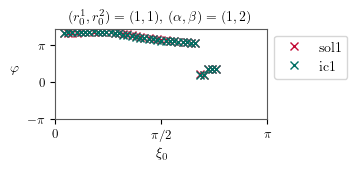

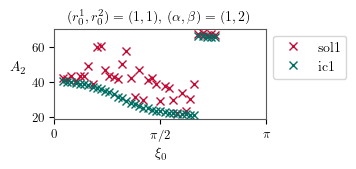

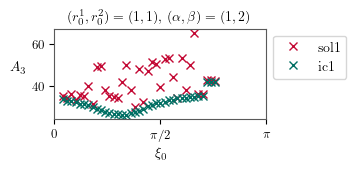

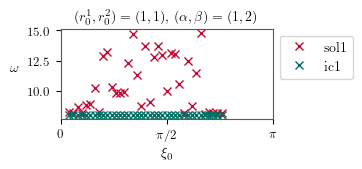

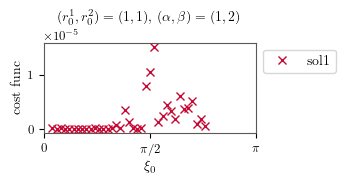

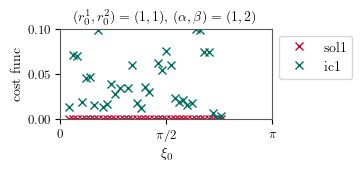

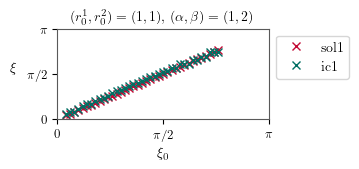

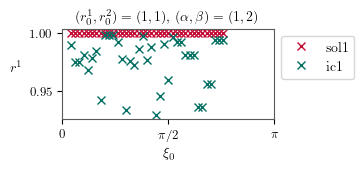

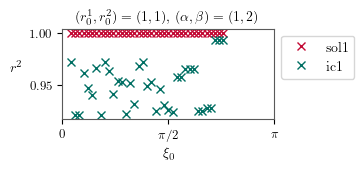

In [11]:
mk_leg = 0
label1 = "sol1"
label2 = "sol2"
label3 = "ic1"
label4 = "ic2"
# label3 = "(1,5,5,100,100)"
# label4 = "(100,100,100,100,100)"
# label5 = "(100,100,100,5,5)"

c5 = "#81D4FA"

figsize = (7/2.56, 3/2.56)
marker = 'x'
fig, ax = plt.subplots(figsize=figsize)
ax.plot(dfP.xi0_frac, dfP.phi, marker, c="#C30934", label=label1)
# ax.plot(dfP2.xi0, dfP2.phi, marker, c="#6517BC", label=label2)
ax.plot(dfP.xi0_frac, dfP.varphi_frac_ic*pi, marker, c="#006F63", label=label3)
# ax.plot(dfP2.xi0, dfP.varphi_frac_ic*pi, marker, c="#F78320", label=label4)
# ax.plot(dfP3.xi0, dfP3.phi, marker, c="#6517BC", label=label3)
# ax.plot(dfP4.xi0, dfP4.phi, marker, c="#F78320", label=label4)
# ax.plot(dfP5.xi0, dfP5.phi, marker, c=c5, label=label5)
# ax.set_yticks([ 0, pi/4, pi/2, 3*pi/4, pi])
# ax.set_yticklabels([ 0, r"$\pi/4$", r"$\pi/2$" , r"$3\pi$/4",  r"$\pi$"])
ax.set_xticks(np.linspace(0,1,3))
# ax.set_xticklabels([fr"${i}\pi$" for i in np.linspace(0,2,5)])
ax.set_xticklabels([r"$0$", r"$\pi/2$", r"$\pi$"])
ax.set_yticks([-pi, 0, pi])
ax.set_yticklabels([r"$-\pi$", r"$0$", r"$\pi$"])
ax.set_xlabel(r"$\xi_0$")
ax.set_ylabel(r"$\varphi$", rotation=0, labelpad=10)
ax.set_title(rf"$(r_0^1, r_0^2) =({r10},{r20})$, $(\alpha,\beta)=({alpha},{beta})$")

leg = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
# leg.set_title("(a,b,c,PG,AG)")
plt.show()

fig, ax = plt.subplots(figsize=figsize)
# ax.plot(dfP.xi0, dfP.A2, marker)
ax.plot(dfP.xi0_frac, dfP.A2, marker, c="#C30934", label=label1)
# ax.plot(dfP2.xi0, dfP2.A2, marker, c="#6517BC", label=label2)
ax.plot(dfP.xi0_frac, dfP.A2_ic, marker, c="#006F63", label=label3)
# ax.plot(dfP2.xi0, dfP2.A2_ic, marker, c="#F78320", label=label4)
# ax.plot(dfP2.xi0, dfP2.A2, marker, c="#006F63", label=label2)
# ax.plot(dfP3.xi0, dfP3.A2, marker, c="#6517BC", label=label3)
# ax.plot(dfP4.xi0, dfP4.A2, marker, c="#F78320", label=label4)
# ax.plot(dfP5.xi0, dfP5.A2, marker, c=c5, label=label5)
# ax.set_yticks([ 0, pi/4, pi/2, 3*pi/4, pi])
# ax.set_yticklabels([ 0, r"$\pi/4$", r"$\pi/2$" , r"$3\pi$/4",  r"$\pi$"])
ax.set_xticks(np.linspace(0,1,3))
ax.set_xticklabels([r"$0$", r"$\pi/2$", r"$\pi$"])
ax.set_xlabel(r"$\xi_0$")
ax.set_ylabel(r"$A_2$", rotation=0, labelpad=10)
ax.set_title(rf"$(r_0^1, r_0^2) =({r10},{r20})$, $(\alpha,\beta)=({alpha},{beta})$")
# ax.set_title(r"$\xi$ coverage for all data")
# plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_presentation"/f"flux_continuity_nh=({sqCentreX},{sqCentreY})_alpha,beta={alpha},{beta}__colourbar_A2.pdf", format="pdf", bbox_inches="tight"
#             # , dpi=1860
#             )

leg = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
# leg.set_title("(a,b,c,PG,AG)")
plt.show()

figsize = (7/2.56, 3/2.56)
fig, ax = plt.subplots(figsize=figsize)
ax.plot(dfP.xi0_frac, dfP.A3, marker, c="#C30934", label=label1)
# ax.plot(dfP2.xi0, dfP2.A3, marker, c="#6517BC", label=label2)
ax.plot(dfP.xi0_frac, dfP.A3_ic, marker, c="#006F63", label=label3)
# ax.plot(dfP2.xi0, dfP2.A3_ic, marker, c="#F78320", label=label4)
# ax.plot(dfP2.xi0, dfP2.A3, marker, c="#006F63", label=label2)
# ax.plot(dfP3.xi0, dfP3.A3, marker, c="#6517BC", label=label3)
# ax.plot(dfP4.xi0, dfP4.A3, marker, c="#F78320", label=label4)
# ax.plot(dfP5.xi0, dfP5.A3, marker, c=c5, label=label5)
# ax.set_yticks([ 0, pi/4, pi/2, 3*pi/4, pi])
# ax.set_yticklabels([ 0, r"$\pi/4$", r"$\pi/2$" , r"$3\pi$/4",  r"$\pi$"])
ax.set_xticks(np.linspace(0,1,3))
ax.set_xticklabels([r"$0$", r"$\pi/2$", r"$\pi$"])
ax.set_xlabel(r"$\xi_0$")
ax.set_ylabel(r"$A_3$", rotation=0, labelpad=10)
ax.set_title(rf"$(r_0^1, r_0^2) =({r10},{r20})$, $(\alpha,\beta)=({alpha},{beta})$")
# ax.set_title(r"$\xi$ coverage for all data")
# plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_presentation"/f"flux_continuity_nh=({sqCentreX},{sqCentreY})_alpha,beta={alpha},{beta}__colourbar_A2.pdf", format="pdf", bbox_inches="tight"
#             # , dpi=1860
#             )

leg = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
# leg.set_title("(a,b,c,PG,AG)")
plt.show()

figsize = (7/2.56, 3/2.56)
fig, ax = plt.subplots(figsize=figsize)
ax.plot(dfP.xi0_frac, dfP.omega, marker, c="#C30934", label=label1)
# ax.plot(dfP2.xi0, dfP2.omega, marker, c="#6517BC", label=label2)
ax.plot(dfP.xi0_frac, dfP.omega_ic, marker, c="#006F63", label=label3)
# ax.plot(dfP2.xi0, dfP2.omega_ic, marker, c="#F78320", label=label4)
# ax.plot(dfP2.xi0, dfP2.omega, marker, c="#006F63", label=label2)
# ax.plot(dfP3.xi0, dfP3.omega, marker, c="#6517BC", label=label3)
# ax.plot(dfP4.xi0, dfP4.omega, marker, c="#F78320", label=label4)
# ax.plot(dfP5.xi0, dfP5.omega, marker, c=c5, label=label5)
# ax.set_yticks([ 0, pi/4, pi/2, 3*pi/4, pi])
# ax.set_yticklabels([ 0, r"$\pi/4$", r"$\pi/2$" , r"$3\pi$/4",  r"$\pi$"])
ax.set_xticks(np.linspace(0,1,3))
ax.set_xticklabels([r"$0$", r"$\pi/2$", r"$\pi$"])
ax.set_xlabel(r"$\xi_0$")
ax.set_ylabel(r"$\omega$", rotation=0, labelpad=10)
ax.set_title(rf"$(r_0^1, r_0^2) =({r10},{r20})$, $(\alpha,\beta)=({alpha},{beta})$")

leg = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
# leg.set_title("(a,b,c,PG,AG)")
plt.show()

figsize = (7/2.56, 3/2.56)
fig, ax = plt.subplots(figsize=figsize)
ax.plot(dfP.xi0_frac, dfP.error, marker, c="#C30934", label=label1)
# ax.plot(dfP2.xi0, dfP2.error, marker, c="#6517BC", label=label2)
# ax.plot(dfP2.xi0, dfP2.error, marker, c="#006F63", label=label2)
# ax.plot(dfP3.xi0, dfP3.error, marker, c="#6517BC", label=label3)
# ax.plot(dfP4.xi0, dfP4.error, marker, c="#F78320", label=label4)
# ax.plot(dfP5.xi0, dfP5.error, marker, c=c5, label=label5)
# ax.set_yticks([ 0, pi/4, pi/2, 3*pi/4, pi])
# ax.set_yticklabels([ 0, r"$\pi/4$", r"$\pi/2$" , r"$3\pi$/4",  r"$\pi$"])
ax.set_xticks(np.linspace(0,1,3))
ax.set_xticklabels([r"$0$", r"$\pi/2$", r"$\pi$"])
ax.set_xlabel(r"$\xi_0$")
ax.set_ylabel(r"cost func")
ax.set_title(rf"$(r_0^1, r_0^2) =({r10},{r20})$, $(\alpha,\beta)=({alpha},{beta})$")
# ax.set_title(r"$\xi$ coverage for all data")
# plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_presentation"/f"flux_continuity_nh=({sqCentreX},{sqCentreY})_alpha,beta={alpha},{beta}__colourbar_A2.pdf", format="pdf", bbox_inches="tight"
#             # , dpi=1860
#             )

leg = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

figsize = (7/2.56, 3/2.56)
fig, ax = plt.subplots(figsize=figsize)
ax.plot(dfP.xi0_frac, dfP.error, marker, c="#C30934", label=label1)
# ax.plot(dfP2.xi0, dfP2.error, marker, c="#6517BC", label=label2)
ax.plot(dfP.xi0_frac, dfP.error_ic, marker, c="#006F63", label=label3)
# ax.plot(dfP3.xi0, dfP3.error, marker, c="#6517BC", label=label3)
# ax.plot(dfP4.xi0, dfP4.error, marker, c="#F78320", label=label4)
# ax.plot(dfP5.xi0, dfP5.error, marker, c=c5, label=label5)
# ax.set_yticks([ 0, pi/4, pi/2, 3*pi/4, pi])
# ax.set_yticklabels([ 0, r"$\pi/4$", r"$\pi/2$" , r"$3\pi$/4",  r"$\pi$"])
ax.set_xticks(np.linspace(0,1,3))
ax.set_ylim([0,0.1])
ax.set_xticklabels([r"$0$", r"$\pi/2$", r"$\pi$"])
ax.set_xlabel(r"$\xi_0$")
ax.set_ylabel(r"cost func")
ax.set_title(rf"$(r_0^1, r_0^2) =({r10},{r20})$, $(\alpha,\beta)=({alpha},{beta})$")
# ax.set_title(r"$\xi$ coverage for all data")
# plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_presentation"/f"flux_continuity_nh=({sqCentreX},{sqCentreY})_alpha,beta={alpha},{beta}__colourbar_A2.pdf", format="pdf", bbox_inches="tight"
#             # , dpi=1860
#             )
leg = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

figsize = (7/2.56, 3/2.56)
fig, ax = plt.subplots(figsize=figsize)
ax.plot(dfP.xi0_frac, dfP.xi, marker, c="#C30934", label=label1)
# ax.plot(dfP2.xi0, dfP2.xi_ic, marker, c="#6517BC", label=label2)
ax.plot(dfP.xi0_frac, dfP.xi_ic, marker, c="#006F63", label=label3)
# ax.plot(dfP3.xi0, dfP3.xi, marker, c="#6517BC", label=label3)
# ax.plot(dfP4.xi0, dfP4.xi, marker, c="#F78320", label=label4)
# ax.plot(dfP5.xi0, dfP5.xi, marker, c=c5, label=label5)
ax.set_yticks([ 0,  pi/2,  pi])
ax.set_yticklabels([ 0, r"$\pi/2$" ,  r"$\pi$"])
ax.set_xticks(np.linspace(0,1,3))
# ax.set_xticklabels([fr"${i}\pi$" for i in np.linspace(0,2,5)])
ax.set_xticklabels([r"$0$", r"$\pi/2$", r"$\pi$"])
ax.set_xlabel(r"$\xi_0$")
ax.set_ylabel(r"$\xi$", rotation=0, labelpad=10)
ax.set_title(rf"$(r_0^1, r_0^2) =({r10},{r20})$, $(\alpha,\beta)=({alpha},{beta})$")

leg = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# ax.set_title(r"$\xi$ coverage for all data")
# plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_presentation"/f"flux_continuity_nh=({sqCentreX},{sqCentreY})_alpha,beta={alpha},{beta}__colourbar_A2.pdf", format="pdf", bbox_inches="tight"
#             # , dpi=1860
#             )
plt.show()


fig, ax = plt.subplots(figsize=figsize)
ax.plot(dfP.xi0_frac, dfP.r1, marker, c="#C30934", label=label1)
# ax.plot(dfP2.xi0, dfP2.r1_ic, marker, c="#6517BC", label=label2)
ax.plot(dfP.xi0_frac, dfP.r1_ic, marker, c="#006F63", label=label3)
# ax.plot(dfP3.xi0, dfP3.r1, marker, c="#6517BC", label=label3)
# ax.plot(dfP4.xi0, dfP4.r1, marker, c="#F78320", label=label4)
# ax.plot(dfP5.xi0, dfP5.r1, marker, c=c5, label=label5)
# ax.set_yticks([ 0, pi/4, pi/2, 3*pi/4, pi])
# ax.set_yticklabels([ 0, r"$\pi/4$", r"$\pi/2$" , r"$3\pi$/4",  r"$\pi$"])
ax.set_xticks(np.linspace(0,1,3))
ax.set_xticklabels([r"$0$", r"$\pi/2$", r"$\pi$"])
ax.set_xlabel(r"$\xi_0$")
ax.set_ylabel(r"$r^1$", rotation=0, labelpad=10)
ax.set_title(rf"$(r_0^1, r_0^2) =({r10},{r20})$, $(\alpha,\beta)=({alpha},{beta})$")
# ax.set_title(r"$\xi$ coverage for all data")
# plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_presentation"/f"flux_continuity_nh=({sqCentreX},{sqCentreY})_alpha,beta={alpha},{beta}__colourbar_A2.pdf", format="pdf", bbox_inches="tight"
#             # , dpi=1860
#             )

leg = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

fig, ax = plt.subplots(figsize=figsize)
ax.plot(dfP.xi0_frac, dfP.r2, marker, c="#C30934", label=label1)
# ax.plot(dfP2.xi0, dfP2.r2_ic, marker, c="#6517BC", label=label2)
ax.plot(dfP.xi0_frac, dfP.r2_ic, marker, c="#006F63", label=label3)
# ax.plot(dfP3.xi0, dfP3.r2, marker, c="#6517BC", label=label3)
# ax.plot(dfP4.xi0, dfP4.r2, marker, c="#F78320", label=label4)
# ax.plot(dfP5.xi0, dfP5.r2, marker, c=c5, label=label5)
# ax.set_yticks([ 0, pi/4, pi/2, 3*pi/4, pi])
# ax.set_yticklabels([ 0, r"$\pi/4$", r"$\pi/2$" , r"$3\pi$/4",  r"$\pi$"])
ax.set_xticks(np.linspace(0,1,3))
ax.set_xticklabels([r"$0$", r"$\pi/2$", r"$\pi$"])
ax.set_xlabel(r"$\xi_0$")
ax.set_ylabel(r"$r^2$", rotation=0, labelpad=10)
ax.set_title(rf"$(r_0^1, r_0^2) =({r10},{r20})$, $(\alpha,\beta)=({alpha},{beta})$")
# ax.set_title(r"$\xi$ coverage for all data")
# plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_presentation"/f"flux_continuity_nh=({sqCentreX},{sqCentreY})_alpha,beta={alpha},{beta}__colourbar_A2.pdf", format="pdf", bbox_inches="tight"
#             # , dpi=1860
#             )

leg = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



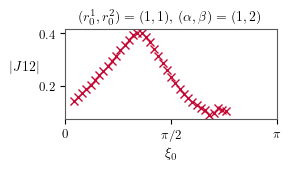

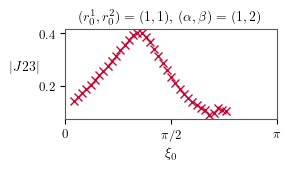

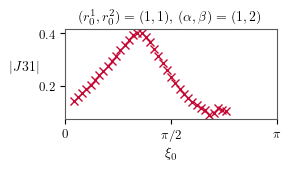

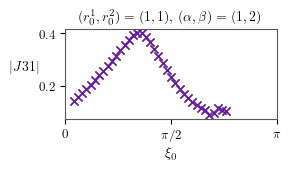

In [13]:
figsize = (7/2.56, 3/2.56)
fig, ax = plt.subplots(figsize=figsize)
ax.plot(dfP.xi0_frac, dfP.absJ12, marker, c="#C30934")
# ax.plot(dfP.xi0, dfP2.absJ12, marker, c="#6517BC")
# ax.set_yticks([ 0,  pi/2,  pi])
# ax.set_yticklabels([ 0, r"$\pi/2$" ,  r"$\pi$"])
ax.set_xticks(np.linspace(0,1,3))
# ax.set_xticklabels([fr"${i}\pi$" for i in np.linspace(0,2,5)])
ax.set_xticklabels([r"$0$", r"$\pi/2$", r"$\pi$"])
ax.set_xlabel(r"$\xi_0$")
ax.set_ylabel(r"$|J12|$", rotation=0, labelpad=10)
ax.set_title(rf"$(r_0^1, r_0^2) =({r10},{r20})$, $(\alpha,\beta)=({alpha},{beta})$")
# ax.set_title(r"$\xi$ coverage for all data")
# plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_presentation"/f"flux_continuity_nh=({sqCentreX},{sqCentreY})_alpha,beta={alpha},{beta}__colourbar_A2.pdf", format="pdf", bbox_inches="tight"
#             # , dpi=1860
#             )
plt.show()

figsize = (7/2.56, 3/2.56)
fig, ax = plt.subplots(figsize=figsize)
ax.plot(dfP.xi0_frac, dfP.absJ23, marker, c="#C30934")
# ax.plot(dfP.xi0, dfP2.absJ23, marker, c="#6517BC")
# ax.set_yticks([ 0, pi/4, pi/2, 3*pi/4, pi])
# ax.set_yticklabels([ 0, r"$\pi/4$", r"$\pi/2$" , r"$3\pi$/4",  r"$\pi$"])
ax.set_xticks(np.linspace(0,1,3))
ax.set_xticklabels([r"$0$", r"$\pi/2$", r"$\pi$"])
ax.set_xlabel(r"$\xi_0$")
ax.set_ylabel(r"$|J23|$", rotation=0, labelpad=10)
ax.set_title(rf"$(r_0^1, r_0^2) =({r10},{r20})$, $(\alpha,\beta)=({alpha},{beta})$")
# ax.set_title(r"$\xi$ coverage for all data")
# plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_presentation"/f"flux_continuity_nh=({sqCentreX},{sqCentreY})_alpha,beta={alpha},{beta}__colourbar_A2.pdf", format="pdf", bbox_inches="tight"
#             # , dpi=1860
#             )
plt.show()

figsize = (7/2.56, 3/2.56)
fig, ax = plt.subplots(figsize=figsize)
ax.plot(dfP.xi0_frac, dfP.absJ31, marker, c="#C30934")
# ax.plot(dfP.xi0, dfP2.absJ31, marker, c="#6517BC")
# ax.set_yticks([ 0, pi/4, pi/2, 3*pi/4, pi])
# ax.set_yticklabels([ 0, r"$\pi/4$", r"$\pi/2$" , r"$3\pi$/4",  r"$\pi$"])
ax.set_xticks(np.linspace(0,1,3))
ax.set_xticklabels([r"$0$", r"$\pi/2$", r"$\pi$"])
ax.set_xlabel(r"$\xi_0$")
ax.set_ylabel(r"$|J31|$", rotation=0, labelpad=10)
ax.set_title(rf"$(r_0^1, r_0^2) =({r10},{r20})$, $(\alpha,\beta)=({alpha},{beta})$")
# ax.set_title(r"$\xi$ coverage for all data")
# plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_presentation"/f"flux_continuity_nh=({sqCentreX},{sqCentreY})_alpha,beta={alpha},{beta}__colourbar_A2.pdf", format="pdf", bbox_inches="tight"
#             # , dpi=1860
#             )
plt.show()



figsize = (7/2.56, 3/2.56)
fig, ax = plt.subplots(figsize=figsize)
ax.plot(dfP.xi0_frac, dfP.absJ12, marker, c="#006F63")
ax.plot(dfP.xi0_frac, dfP.absJ23, marker, c="#F78320")
ax.plot(dfP.xi0_frac, dfP.absJ31, marker, c="#6517BC")
# ax.plot(dfP.xi0, dfP2.absJ31, marker, c="#6517BC")
# ax.set_yticks([ 0, pi/4, pi/2, 3*pi/4, pi])
# ax.set_yticklabels([ 0, r"$\pi/4$", r"$\pi/2$" , r"$3\pi$/4",  r"$\pi$"])
ax.set_xticks(np.linspace(0,1,3))
ax.set_xticklabels([r"$0$", r"$\pi/2$", r"$\pi$"])
ax.set_xlabel(r"$\xi_0$")
ax.set_ylabel(r"$|J31|$", rotation=0, labelpad=10)
ax.set_title(rf"$(r_0^1, r_0^2) =({r10},{r20})$, $(\alpha,\beta)=({alpha},{beta})$")
# ax.set_title(r"$\xi$ coverage for all data")
# plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_presentation"/f"flux_continuity_nh=({sqCentreX},{sqCentreY})_alpha,beta={alpha},{beta}__colourbar_A2.pdf", format="pdf", bbox_inches="tight"
#             # , dpi=1860
#             )
plt.show()
